# Яруллин Рамиль, БПМИ 133

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задание 0

In [43]:
data = pd.read_csv('housingprices.txt')
data

,Price,Beds,Baths,Square Feet,Miles to Resort,Miles to Base,Acres,Cars,Years Old,DoM
0,330.0,3,2.00,1771,15,20,0.230,2,4,127
1,400.0,3,2.00,1213,5,1,0.170,1,5,98
2,416.0,3,2.50,1884,2,7,0.180,2,16,105
3,420.0,3,2.00,1922,1,6,0.290,1,80,103
4,496.0,4,2.50,1858,0,5,0.520,2,9,39
5,690.0,3,2.25,1948,1,6,21.910,2,20,403
6,230.0,2,1.00,1200,52,48,40.000,2,21,211
7,448.0,3,2.00,2002,2,7,0.180,1,18,126
8,160.0,1,1.00,768,45,50,0.290,0,37,67
9,250.0,1,1.00,930,45,50,0.590,0,26,92


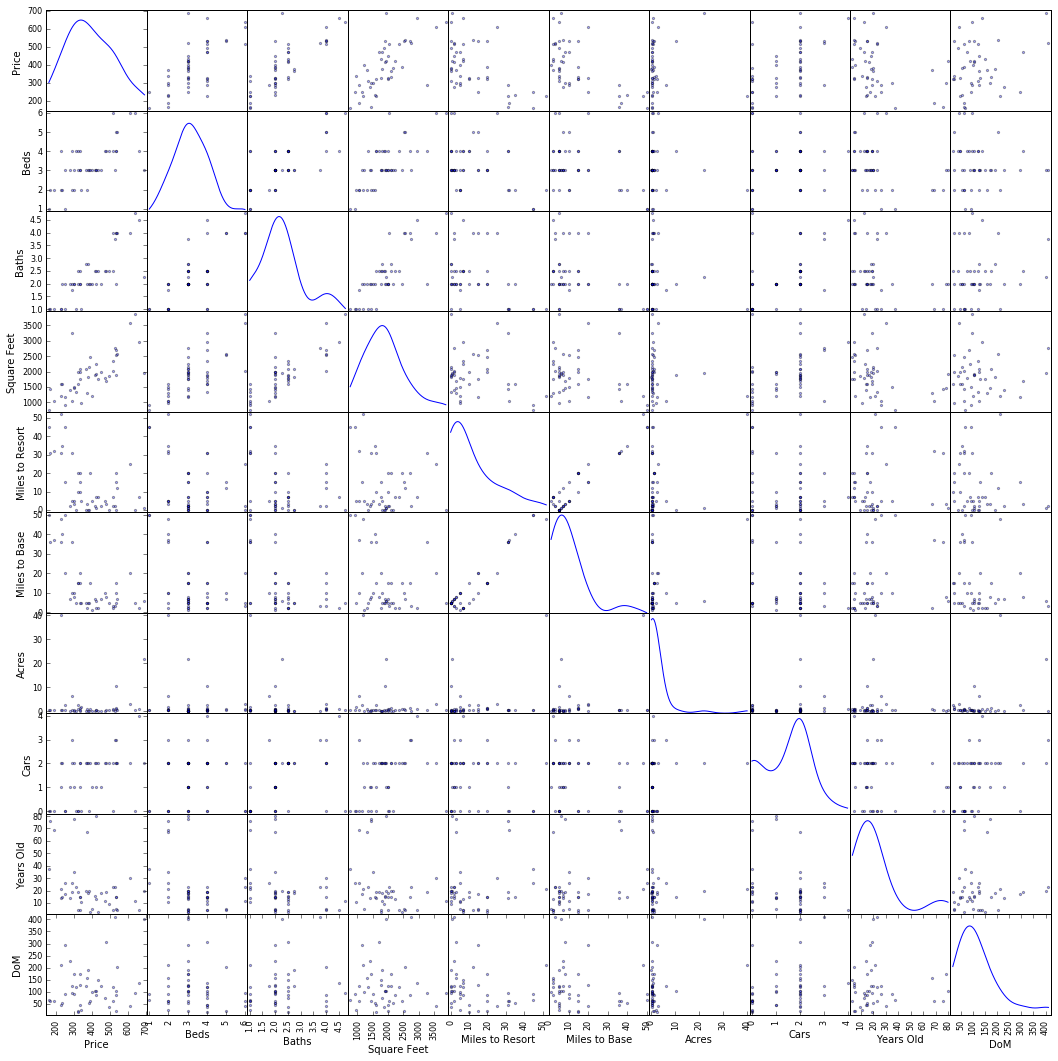

In [16]:
from pandas.tools import plotting

plotting.scatter_matrix(data, alpha=0.35, figsize=(18, 18), diagonal='kde')
pass

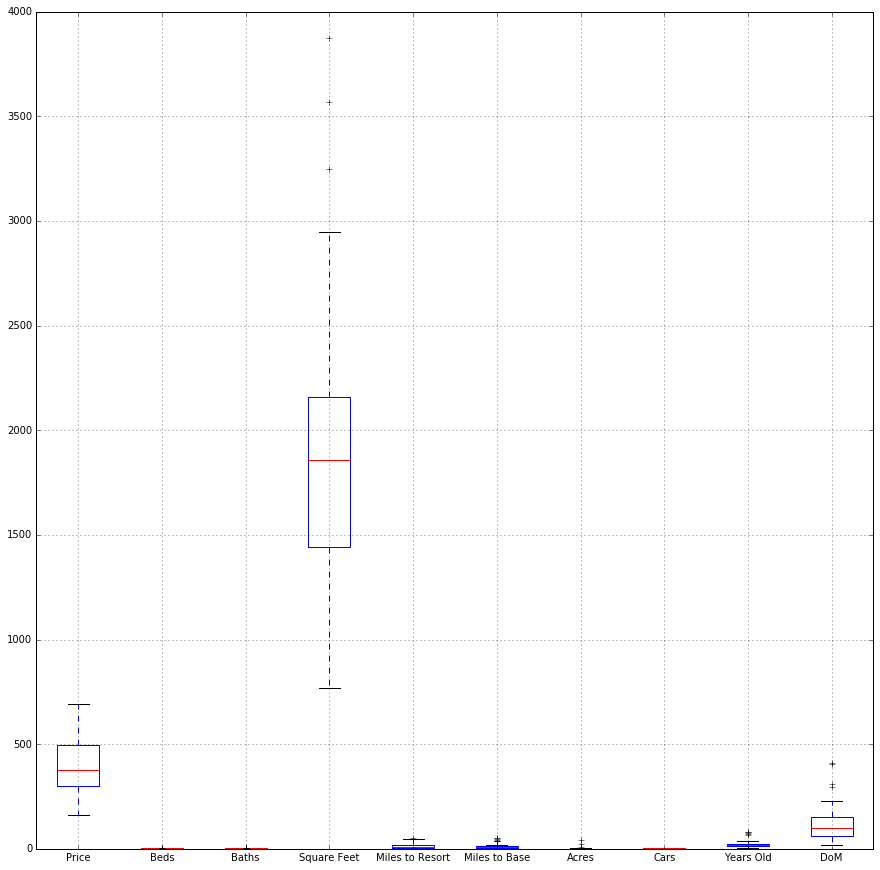

In [24]:
plt.figure(figsize=(15, 15))
data.boxplot()
pass

## Задание 1

Разделим теперь выборку на обучающую и тестовую:

In [39]:
from sklearn.model_selection import train_test_split

X = np.array(data[data.columns[1:]])
y = np.array(data['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2321)

## Задание 2

Теперь построим предсказательные модели для столбца 'Price'. Для этого мы изпользуем Ridge и Lasso регрессию. Сделаем кросс-валидацию по параметру alpha в обоих случаях, чтобы выяснить, какие разумно использовать значения параметра alpha для обоих из моделей.

Будем использовать MSE-метрику.

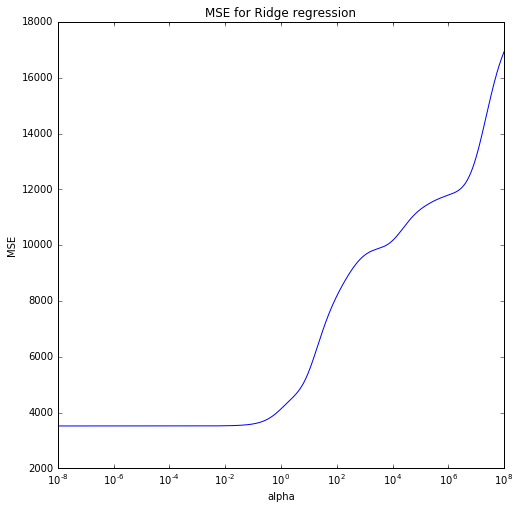

In [94]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

cross_val_error_ridge = []
alpha_values = np.logspace(-8, 8, 1000)
for alpha in alpha_values:
    cross_val_error_ridge.append(
        -cross_val_score(
            Ridge(alpha=alpha, fit_intercept=True),
            X_train, y_train,
            scoring='neg_mean_squared_error',
            cv=5).mean())
plt.figure(figsize=(8, 8))
plt.plot(alpha_values, cross_val_error_ridge)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for Ridge regression')
pass

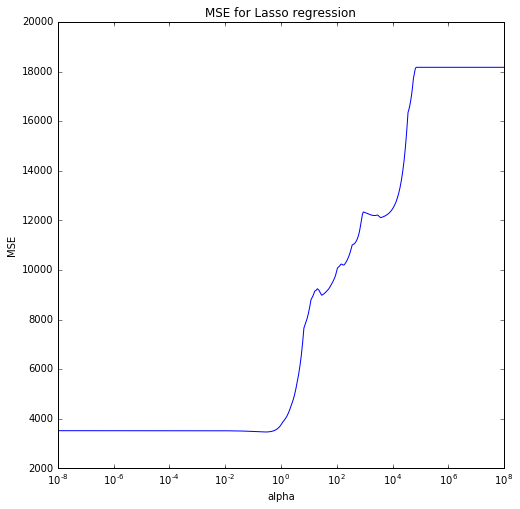

In [95]:
cross_val_error_lasso = []
alpha_values = np.logspace(-8, 8, 1000)
for alpha in alpha_values:
    cross_val_error_lasso.append(
        -cross_val_score(
            Lasso(alpha=alpha, fit_intercept=True),
            X_train, y_train,
            scoring='neg_mean_squared_error', 
            cv=5).mean())
plt.figure(figsize=(8, 8))
plt.plot(alpha_values, cross_val_error_lasso)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for Lasso regression')
pass

В обоих случаях для тестирования можно взять промежуток $[10^{-2}, 10^{3}]$

In [101]:
from sklearn.metrics import mean_squared_error
def build_mse_plots(model, alpha_values, 
                    X_train, y_train, X_test, y_test, title):
    errors_train = []
    errors_test = []
    for alpha in alpha_values:
        regressor = model(alpha=alpha, fit_intercept=True)
        regressor.fit(X_train, y_train)
        errors_train.append(mean_squared_error(y_train, regressor.predict(X_train)))
        errors_test.append(mean_squared_error(y_test, regressor.predict(X_test)))
    _, sub = plt.subplots(2, sharex=True, figsize=(10, 10))
    sub[0].plot(alpha_values, errors_train)
    sub[0].set_title(title + ': train')
    sub[1].plot(alpha_values, errors_test)
    sub[1].set_title(title + ': test')
    plt.xscale('log')
    
ridge_alpha_values = np.logspace(-2, 5, 1000)
lasso_alpha_values = np.logspace(-2, 5, 1000)

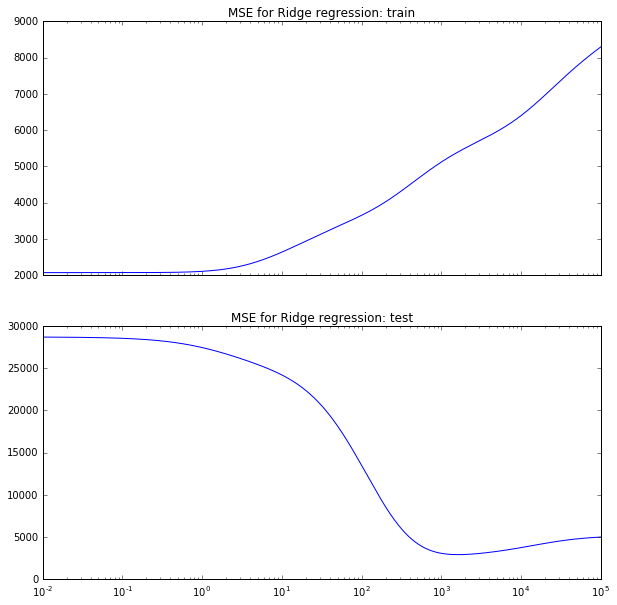

In [102]:
build_mse_plots(Ridge, ridge_alpha_values, 
                X_train, y_train, X_test, y_test, 'MSE for Ridge regression')

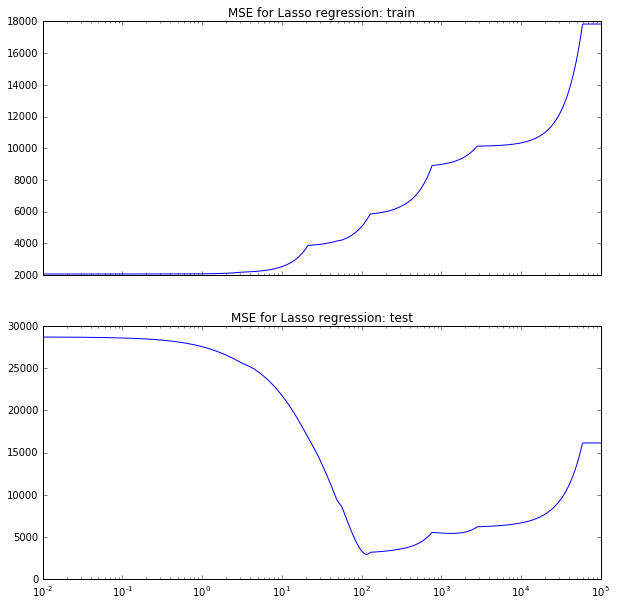

In [103]:
build_mse_plots(Lasso, ridge_alpha_values, 
                X_train, y_train, X_test, y_test, 
                'MSE for Lasso regression')

In [181]:
const_prediction = [y_train.mean()] * len(y_train)
print('Train: ', mean_squared_error(y_train, const_prediction))
const_prediction = [y_train.mean()] * len(y_test)
print('Test: ', mean_squared_error(y_test, const_prediction))

Train:  17839.5296566
Test:  16145.2287766


Константное предсказание - среднее по всем целевым переменным обучающей выборки - дает очень низкий результат на test.

## Задание 3

In [126]:
def build_coefs_plots(model, alpha_values, 
                      X_train, y_train, X_test, y_test, title):
    coefs_values = [[] for _ in range(len(data.columns))]
    for alpha in alpha_values:
        regressor = model(alpha=alpha, fit_intercept=True)
        regressor.fit(X_train, y_train)
        for i, coef in enumerate(regressor.coef_):
            coefs_values[i].append(coef)
        coefs_values[-1].append(regressor.intercept_)
    plt.figure(figsize=(15, 0))
    for i, coefs_list in enumerate(coefs_values):
        plt.subplot(5, 2, i + 1)
        plt.plot(alpha_values, coefs_list)
        plt.xlabel('alpha')
        if i < len(coefs_values) - 1:
            plt.ylabel('Slope coefficient %d' % (i + 1))
            plt.title(title + 'slope coefficient %d' % (i + 1))
        else:
            plt.ylabel('Intercept')
            plt.title(title + 'intercept')

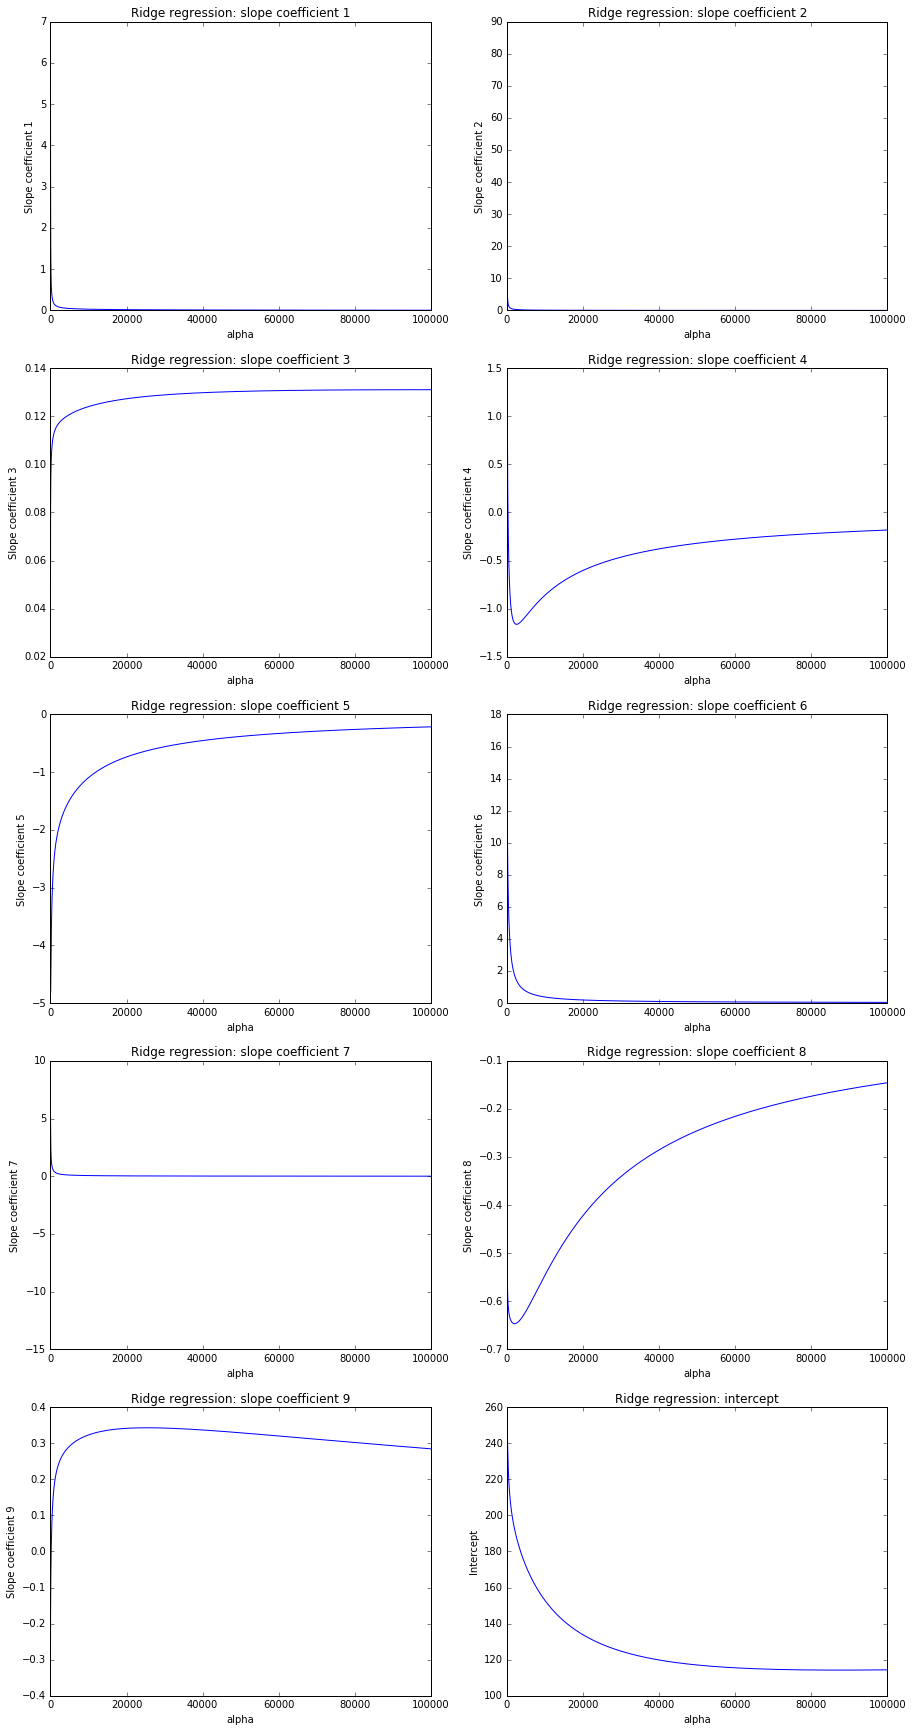

In [128]:
build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Ridge regression: ')

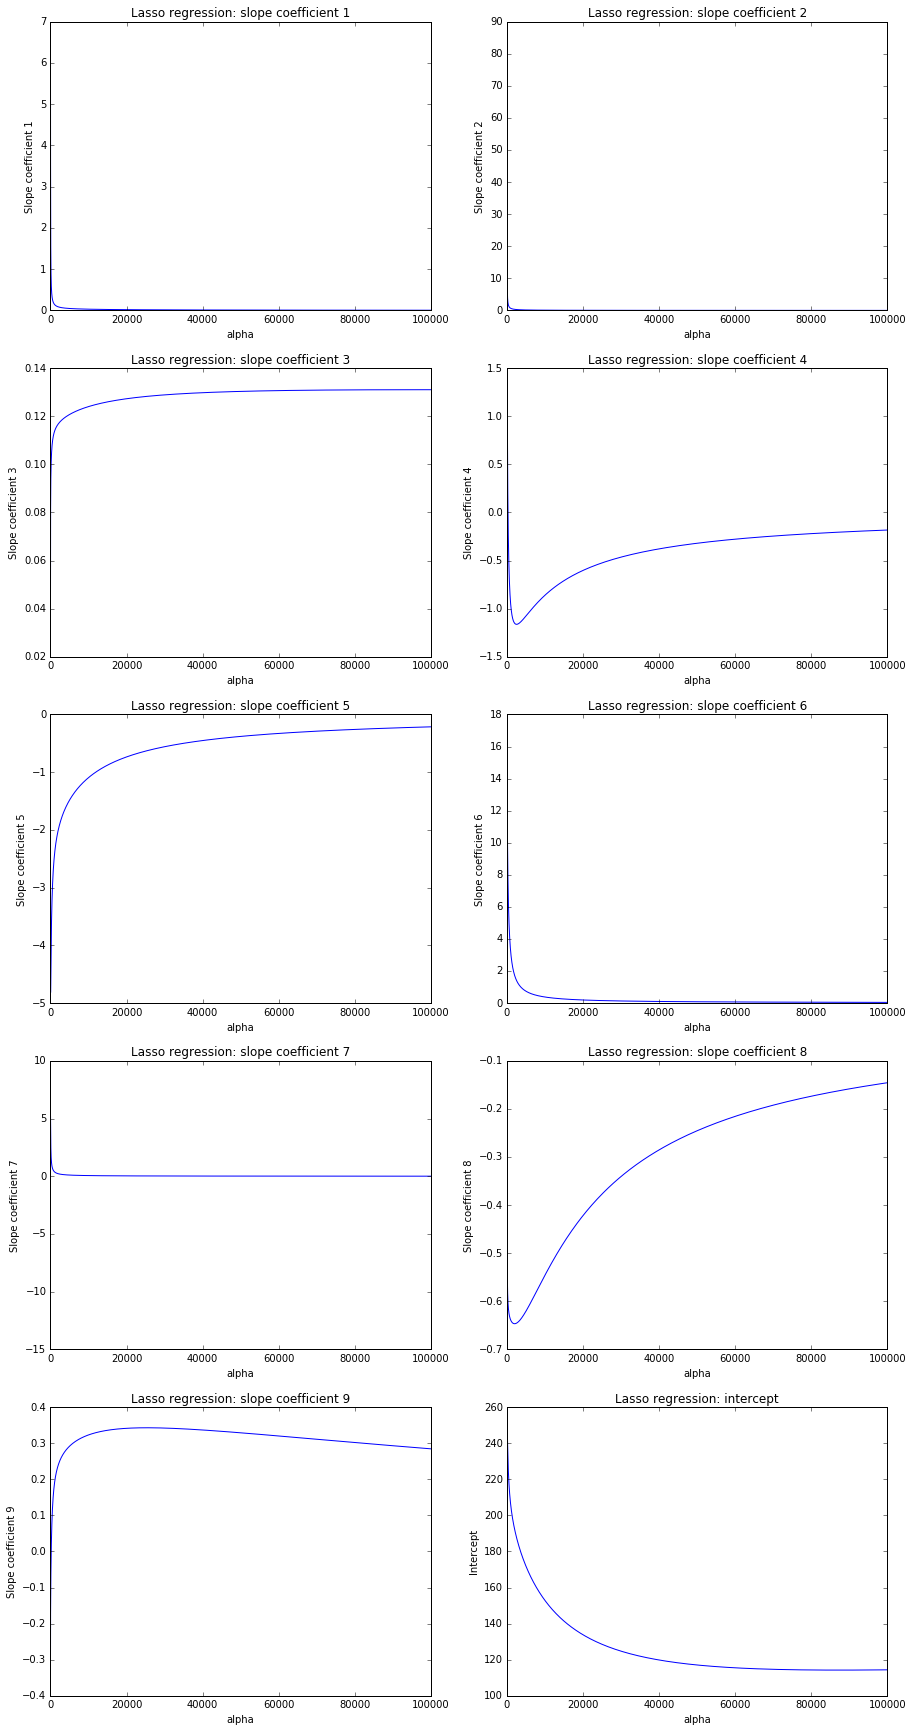

In [129]:
build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Lasso regression: ')

## Задание 4

Из графиков видно, что все признаки важны, но 'Cars' и 'Beds' -- наиболее важные (при alpha=0.1)

## Задание 5

Напишем функцию, которая выполняет предыдущие пункты:

In [131]:
def analyse(data, seed=0):
    X = np.array(data[data.columns[1:]])
    y = np.array(data['Price'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=seed)
    build_mse_plots(Ridge, ridge_alpha_values, 
                    X_train, y_train, X_test, y_test, 'MSE for Ridge regression')
    build_mse_plots(Lasso, ridge_alpha_values, 
                    X_train, y_train, X_test, y_test, 'MSE for Lasso regression')
    build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Ridge regression: ')
    build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Lasso regression: ')

Запустим теперь ее с разными seed-ами

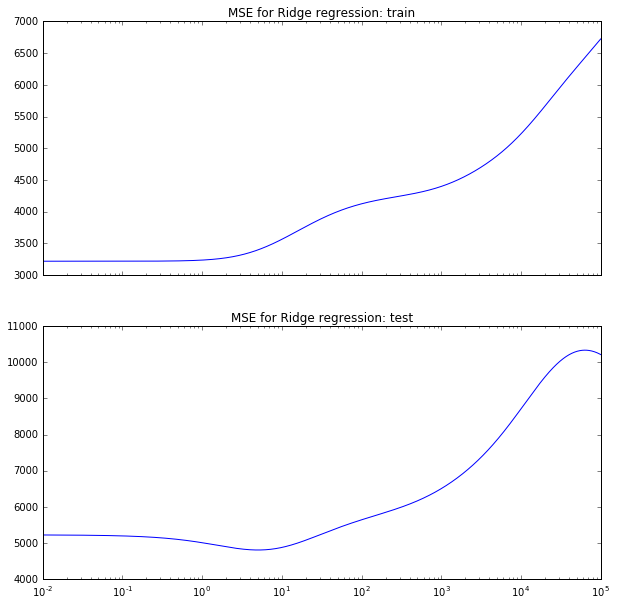

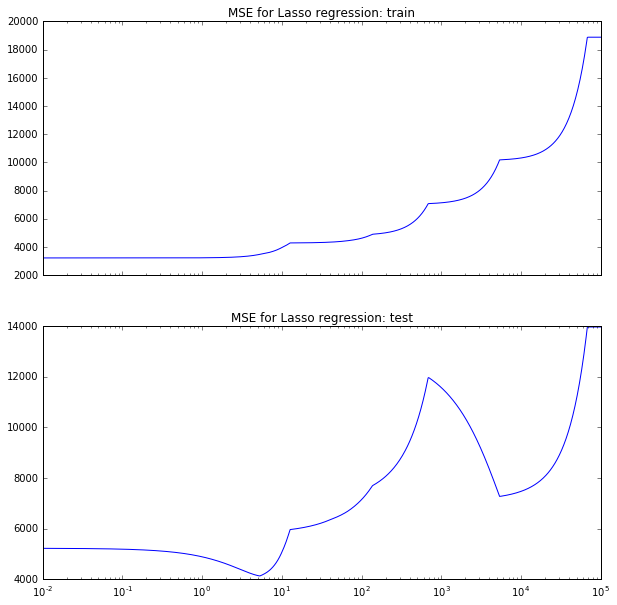

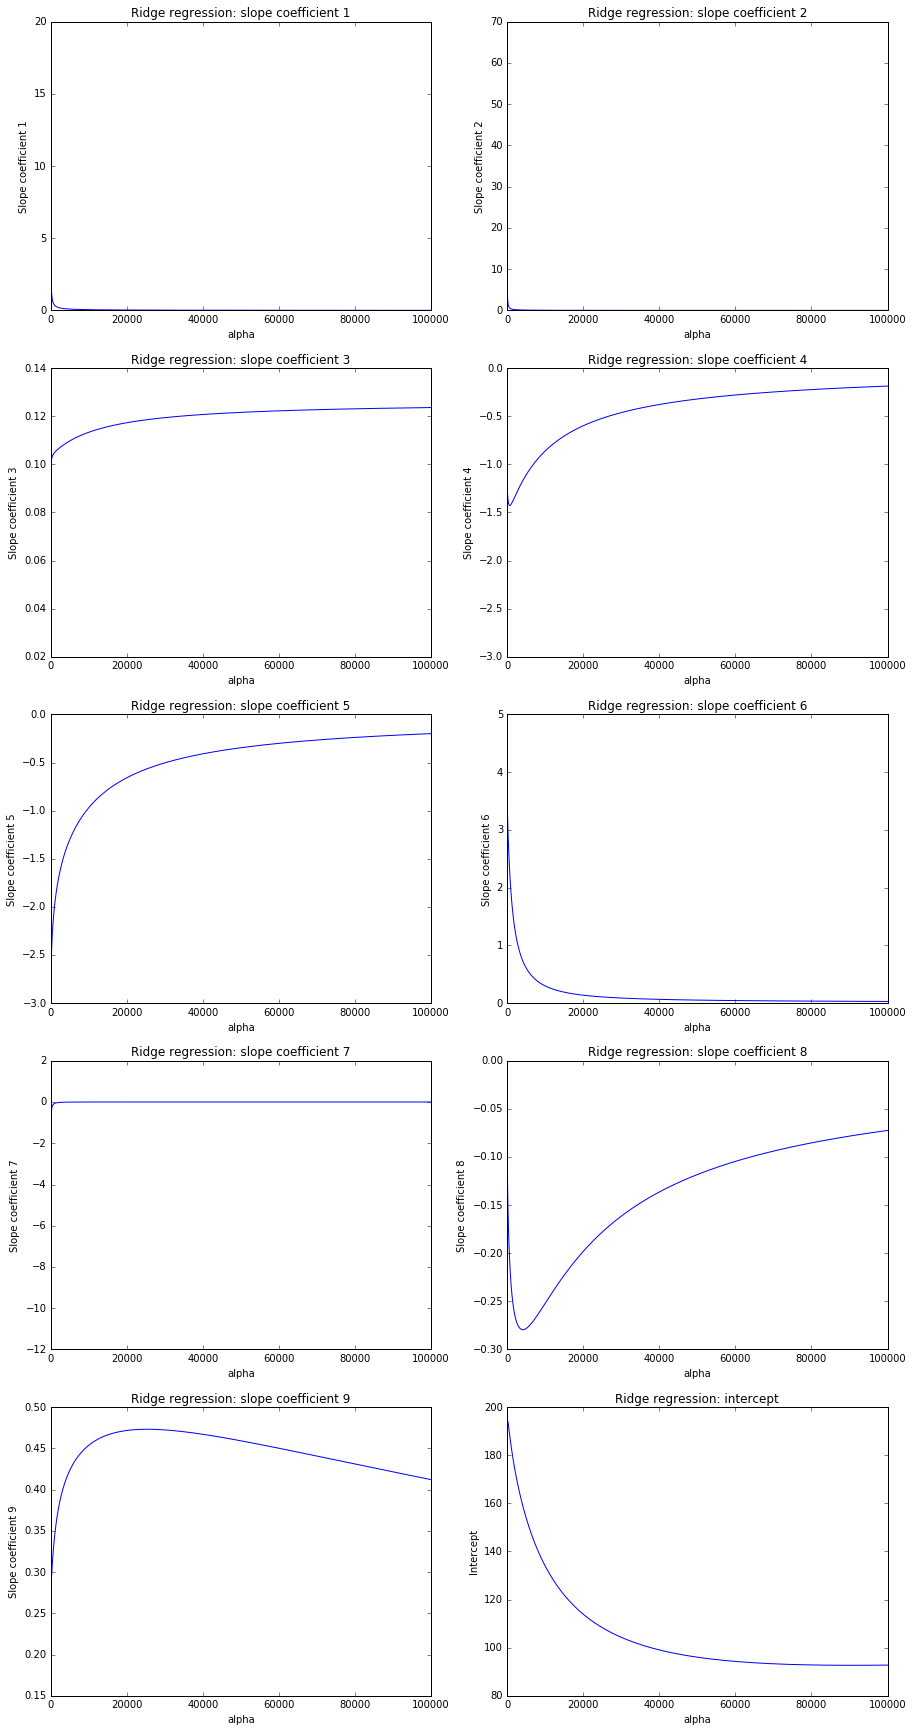

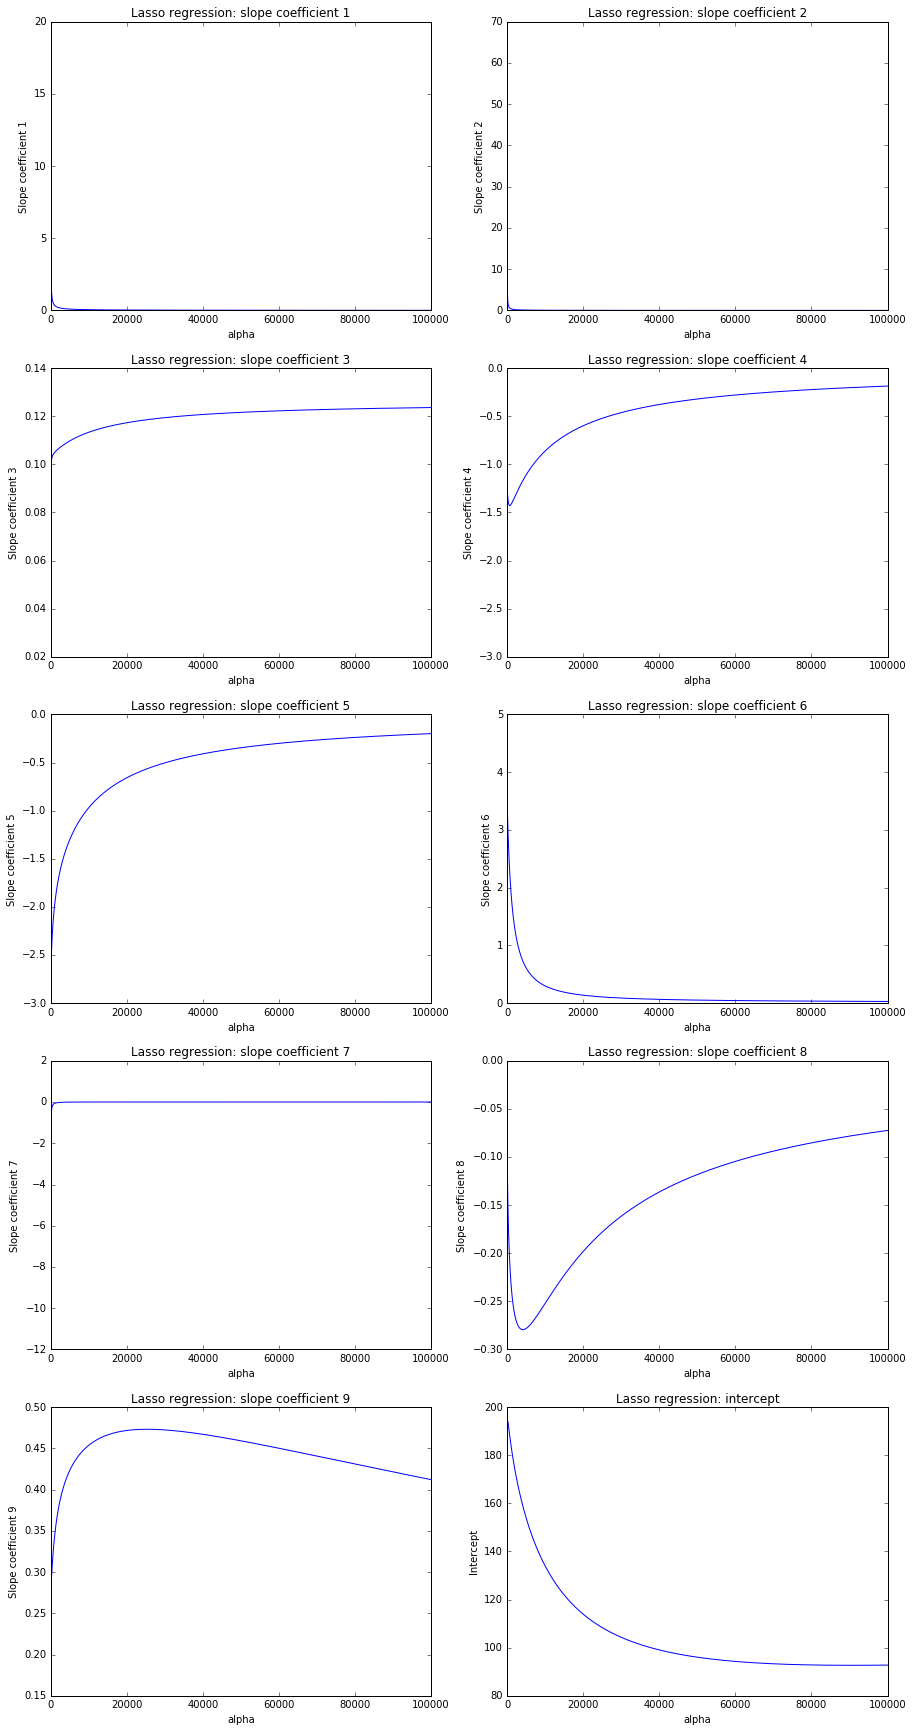

In [132]:
analyse(data, seed=0)

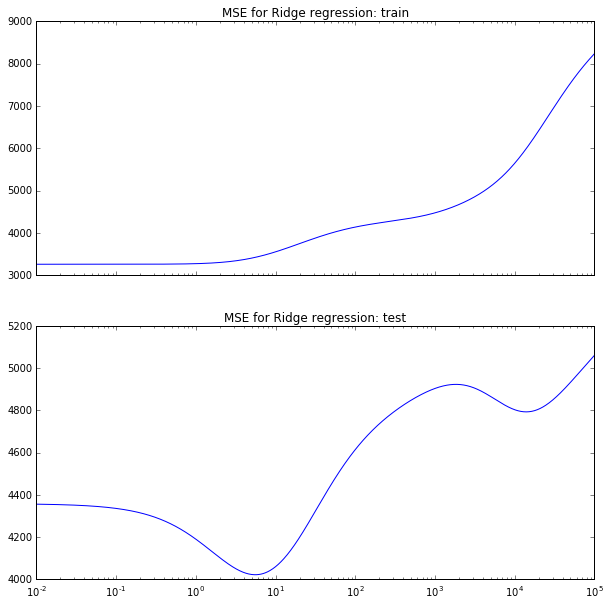

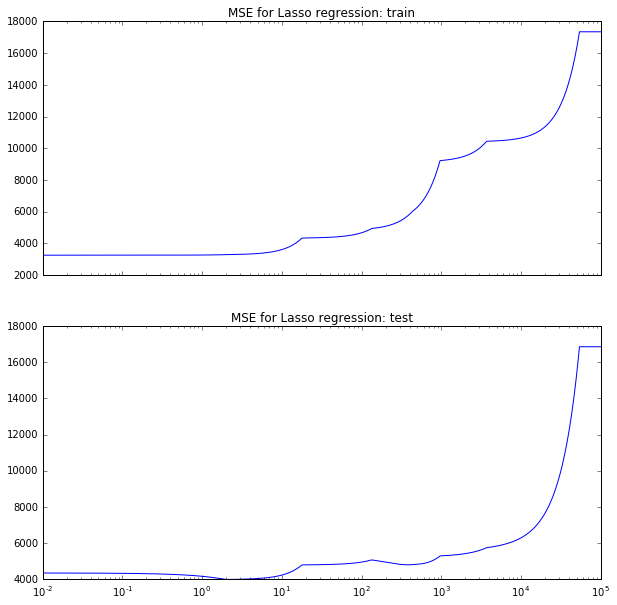

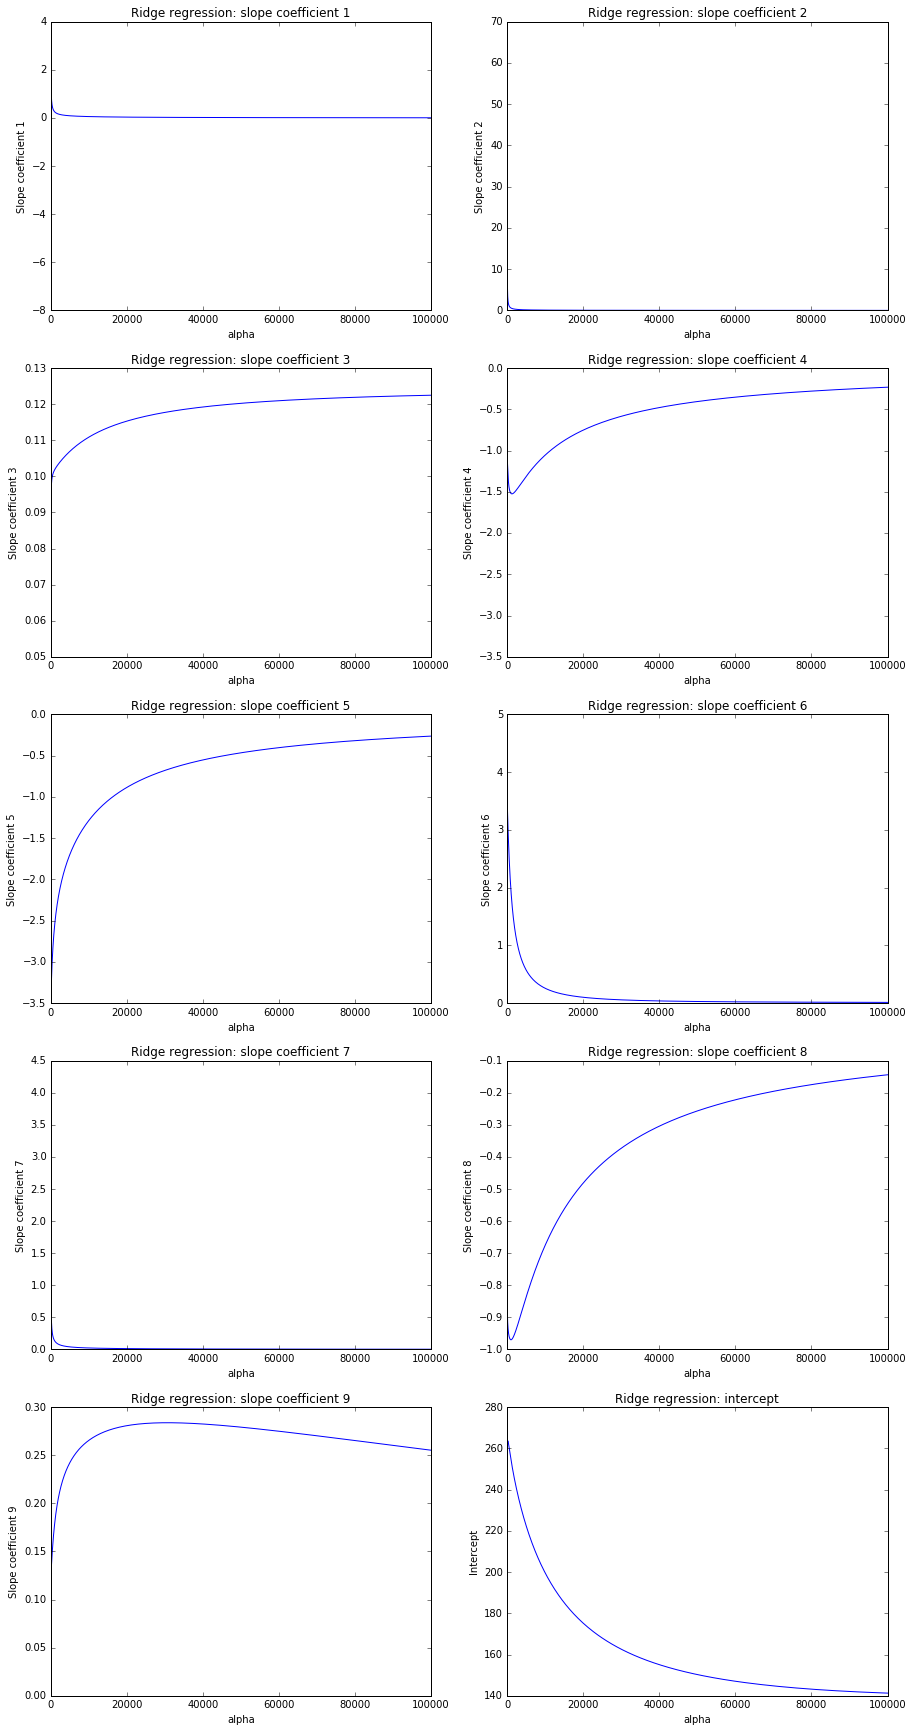

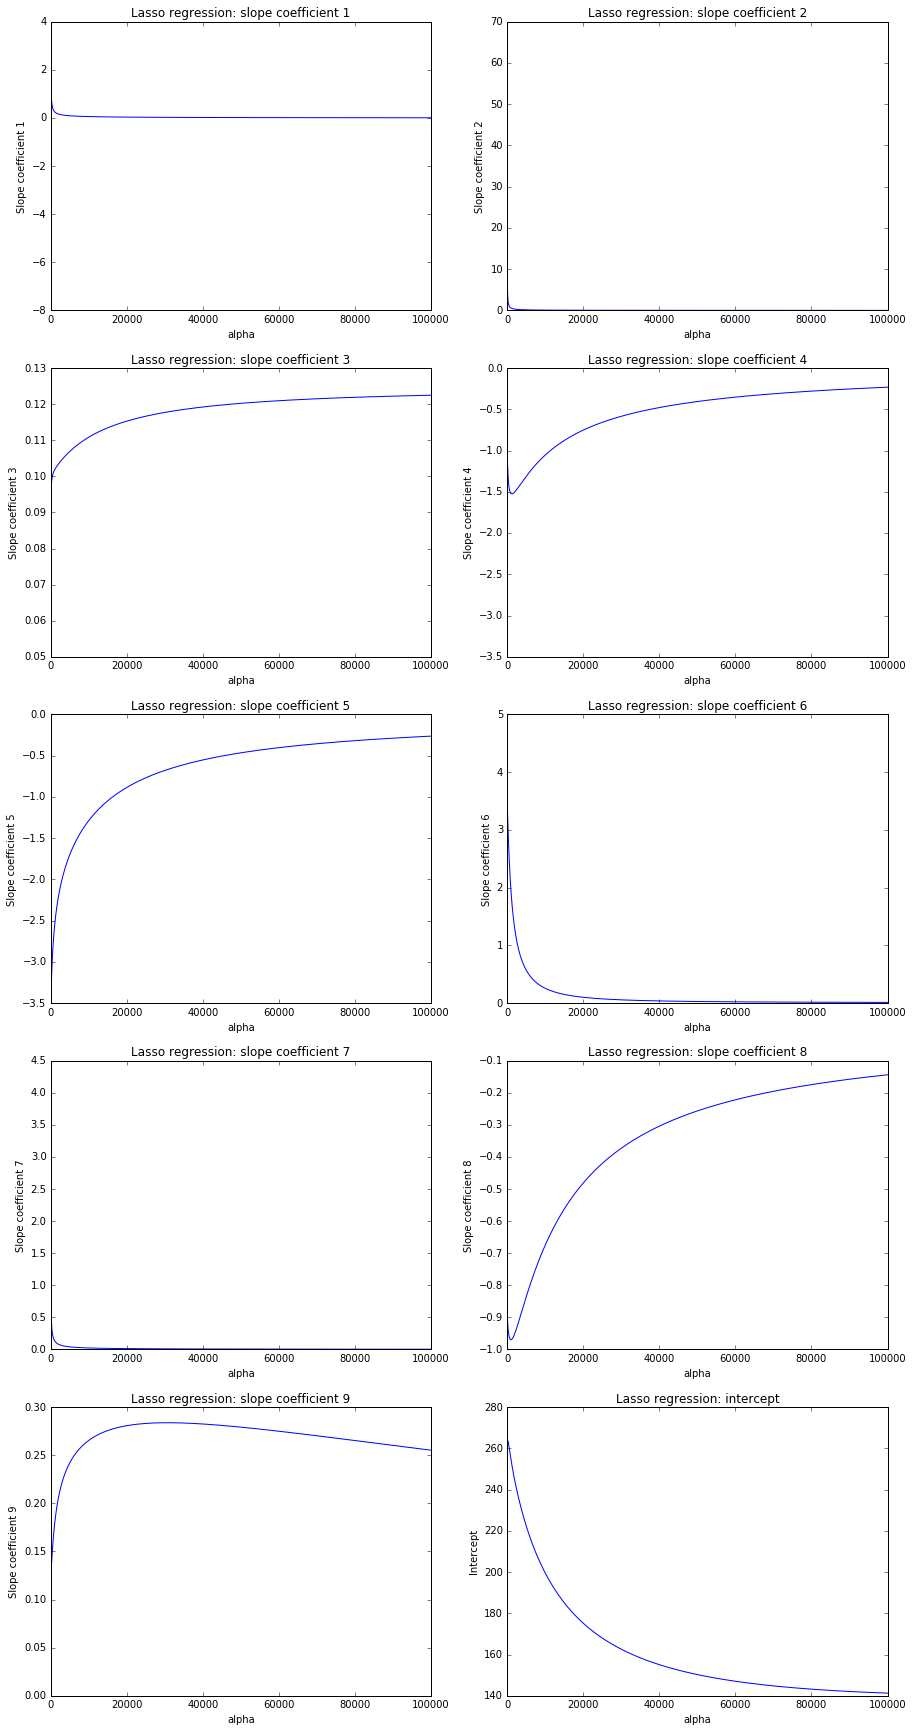

In [133]:
analyse(data, seed=1)

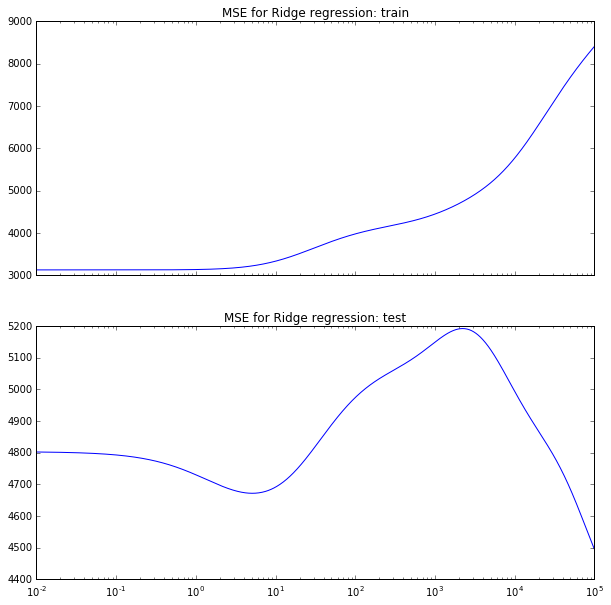

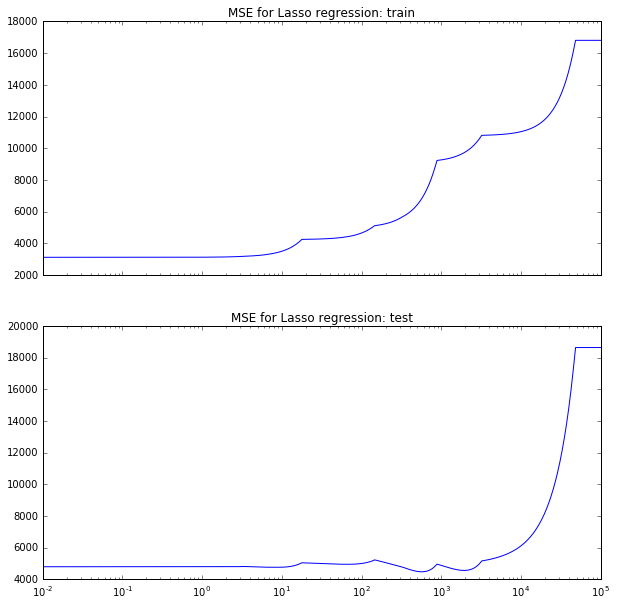

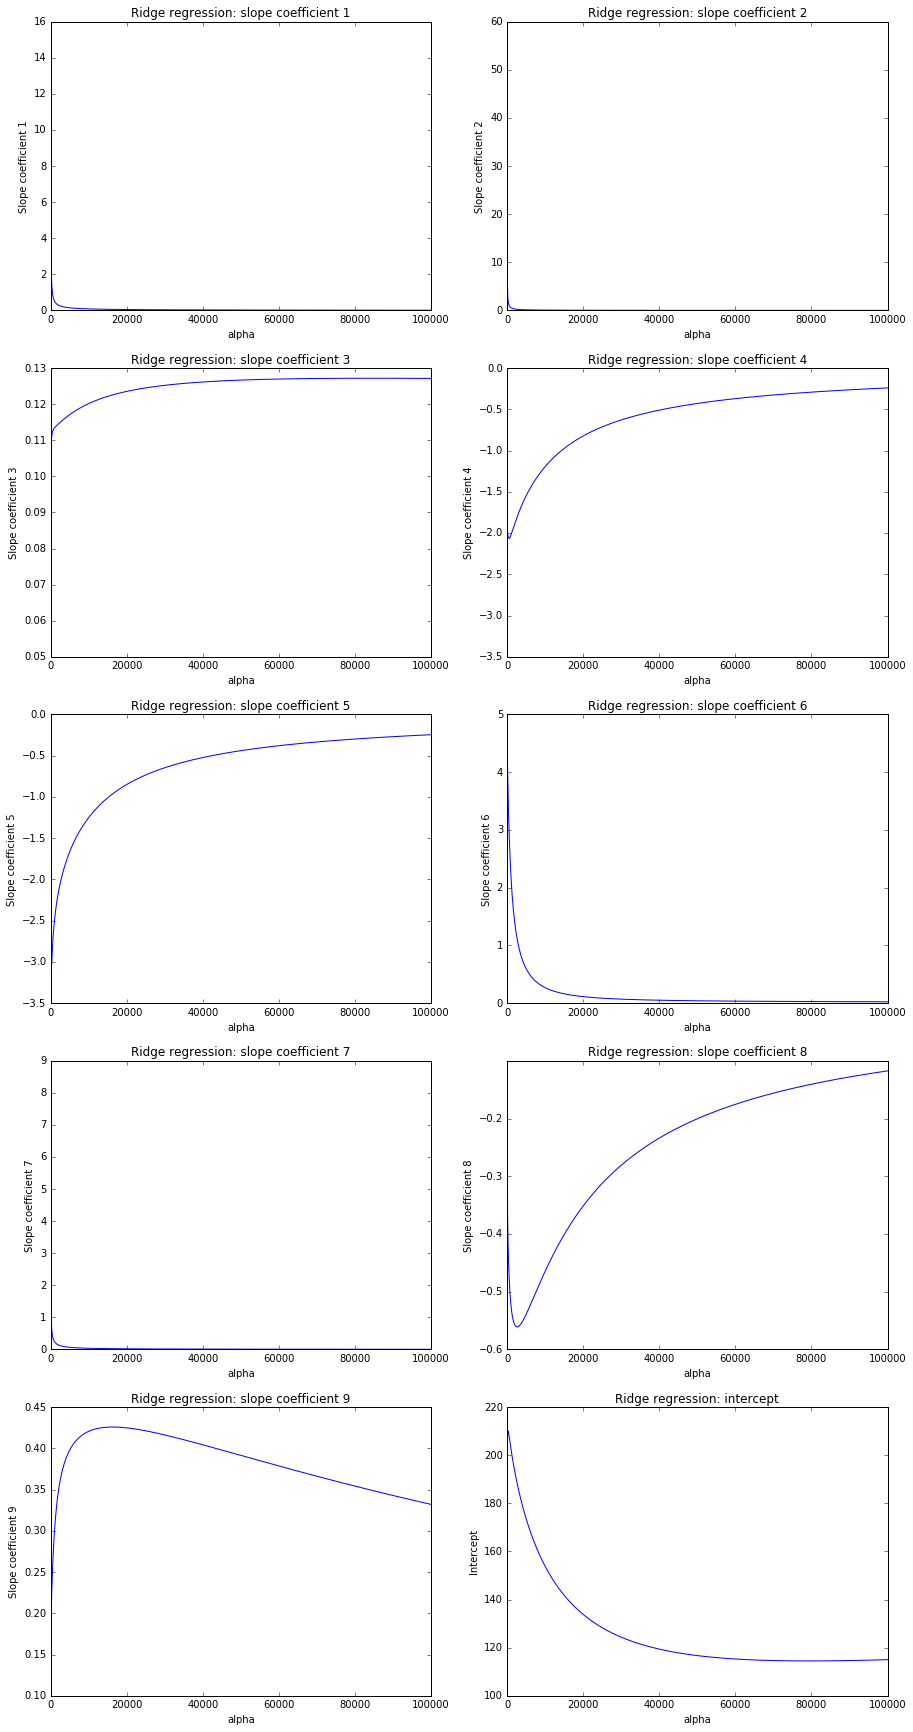

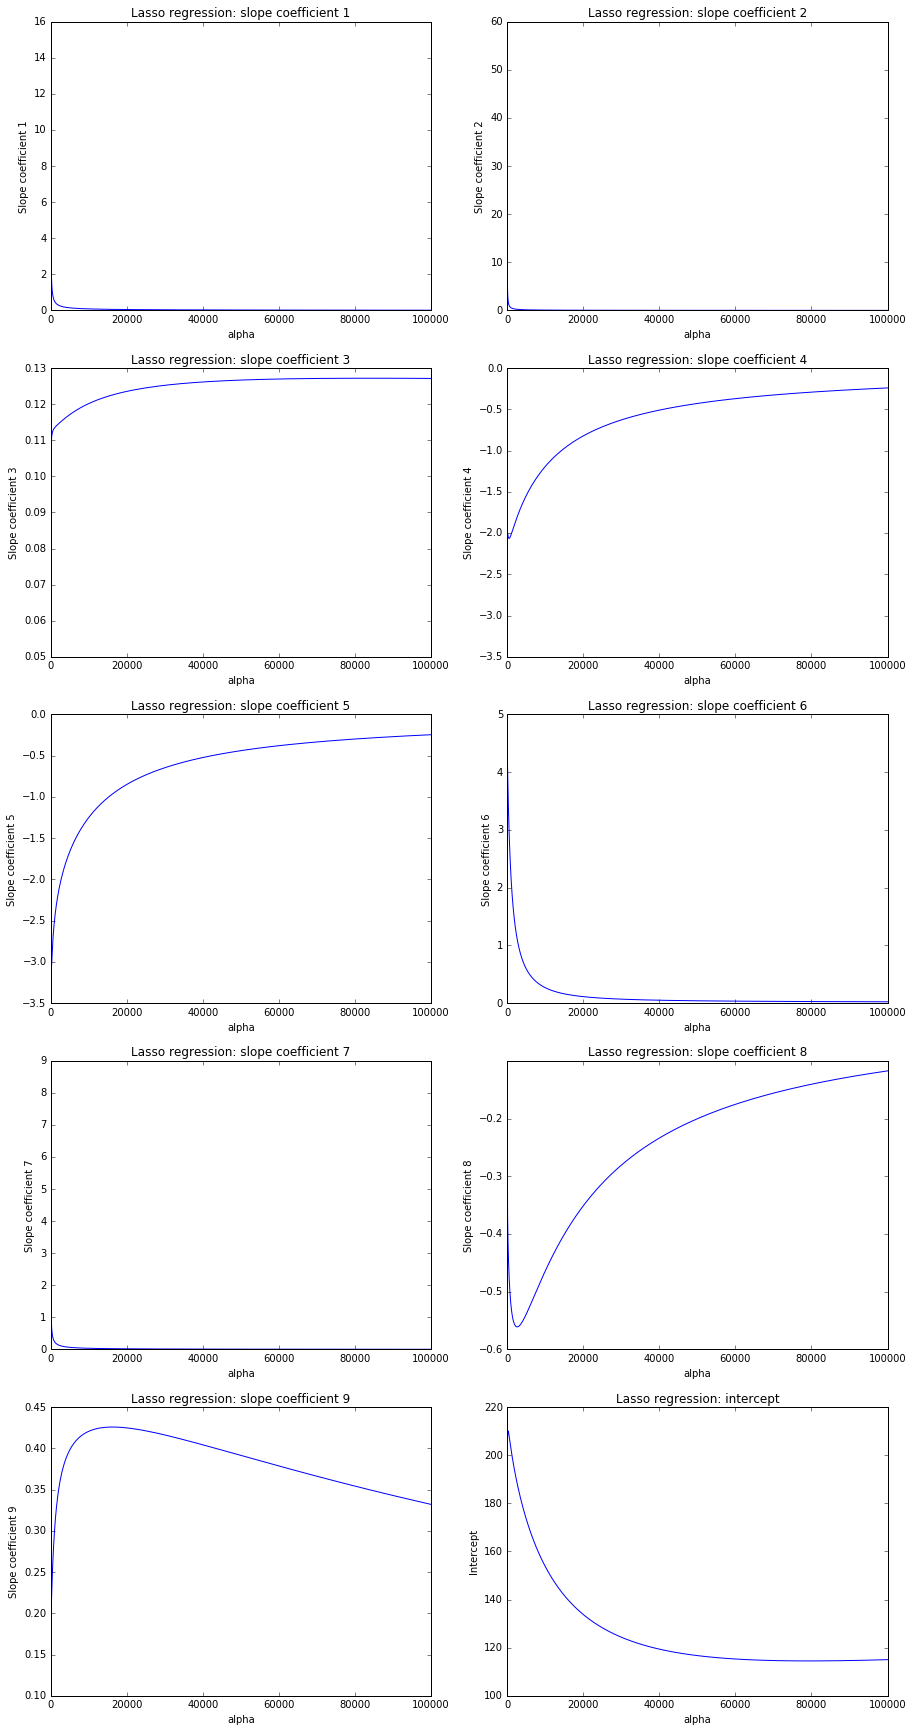

In [134]:
analyse(data, seed=2)

Мы можем сделать вывод, что от seed-а очень сильно зависят результаты. Это потому что данных очень мало и, как следствие, дисперсия всех показателей (оптимального параметра alpha, ошибки, коэффициентов и т.д.) большая. Поэтому результаты такие разные.

## Задание 6

Судя по графикам выше, можем полагать, что адекватной моделью будет Ridge(alpha=0.1) и Lasso(alpha=0.1)

In [157]:
def evaluate(model, alpha, X, y, X_train, y_train, X_test, y_test):
    regressor = model(alpha=alpha, fit_intercept=True)
    regressor.fit(X_train, y_train)
    error_train = mean_squared_error(y_test, regressor.predict(X_test))
    coefs_train = regressor.coef_ + [regressor.intercept_]
    regressor.fit(X, y)
    error_full = mean_squared_error(y_test, regressor.predict(X_test))
    coefs_full = regressor.coef_ + [regressor.intercept_]
    print('Ошибка после обучения только на train:', error_train)
    print('Ошибка после обучения на всей выборке:', error_full)
    print('Коэффициенты после обучения только на train:', coefs_train)
    print('Коэффициенты после обучения на всей выборке:', coefs_full)
    print('Ошибка после обучения только на test:', error_full)
    print('Соотношение ошибки, полученной после обучение на все выборке и после обучения на train: ',
          error_full / error_train)
    
    print(np.array(coefs_full) / coefs_train)

In [167]:
evaluate(Ridge, 0.1, X, y, X_train, y_train, X_test, y_test)

Ошибка после обучения только на train: 28525.0354466
Ошибка после обучения на всей выборке: 2573.64986695
Коэффициенты после обучения только на train: [ 217.78077986  303.81380908  216.6119265   215.64758087  214.68966873
  233.99476083  203.71719233  216.05459878  216.21407878]
Коэффициенты после обучения на всей выборке: [ 189.42638678  232.34054421  179.59996938  177.86886419  177.66023533
  184.20032145  185.98835161  179.28149486  179.58828253]
Ошибка после обучения только на test: 2573.64986695
Соотношение ошибки, полученной после обучение на все выборке и после обучения на train:  0.0902242478109
[ 0.86980305  0.76474649  0.82913241  0.8248127   0.82752112  0.78719849
  0.91297327  0.82979717  0.83060402]


In [168]:
evaluate(Lasso, 0.1, X, y, X_train, y_train, X_test, y_test)

Ошибка после обучения только на train: 28565.9876882
Ошибка после обучения на всей выборке: 2582.60661167
Коэффициенты после обучения только на train: [ 217.42707861  304.92676989  216.70815479  215.69517762  214.83619727
  234.11413329  203.4742442   216.14599169  216.30810048]
Коэффициенты после обучения на всей выборке: [ 189.59374631  233.07461477  180.07092759  178.33384772  178.13307606
  184.67989035  186.2402293   179.74982323  180.05877632]
Ошибка после обучения только на test: 2582.60661167
Соотношение ошибки, полученной после обучение на все выборке и после обучения на train:  0.0904084479718
[ 0.87198774  0.76436259  0.83093748  0.82678644  0.82915765  0.78884554
  0.91530125  0.83161303  0.83241809]


## Задание 7

К некоторым столбцам имеет смысл применить логарифмическое преобразование. Попробуем.

In [170]:
new_data = data[:]
new_data['Acres'] = data['Acres'].apply(np.log)
new_data['Miles to Base'] = data['Miles to Base'].apply(np.log)
new_data['Miles to Resort'] = data['Miles to Resort'].apply(lambda x: np.log(x + 1))
new_data['Years Old'] = data['Years Old'].apply(np.log)

In [172]:
def analyse(data, seed=0):
    X = np.array(data[data.columns[1:]])
    y = np.array(data['Price'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=seed)
    build_mse_plots(Ridge, ridge_alpha_values, 
                    X_train, y_train, X_test, y_test, 'MSE for Ridge regression')
    build_mse_plots(Lasso, ridge_alpha_values, 
                    X_train, y_train, X_test, y_test, 'MSE for Lasso regression')
    build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Ridge regression: ')
    build_coefs_plots(Ridge, ridge_alpha_values, 
                  X_train, y_train, X_test, y_test, 'Lasso regression: ')
    return X, y, X_train, y_train, X_test, y_test

Теперь повторим все предыдущие пункты для новых данных

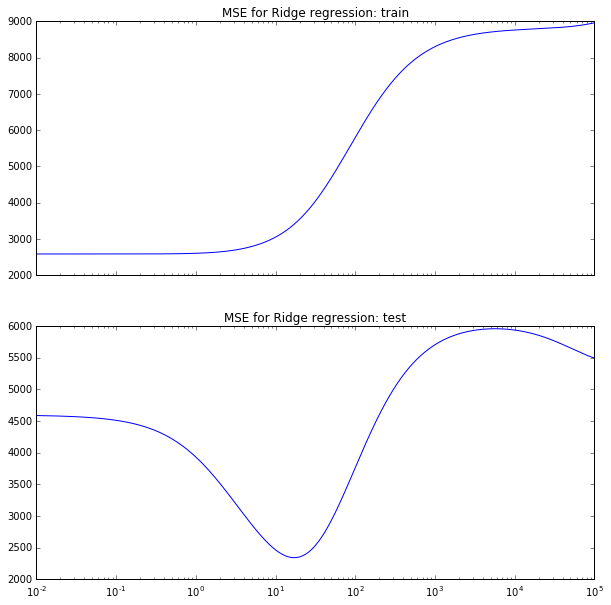

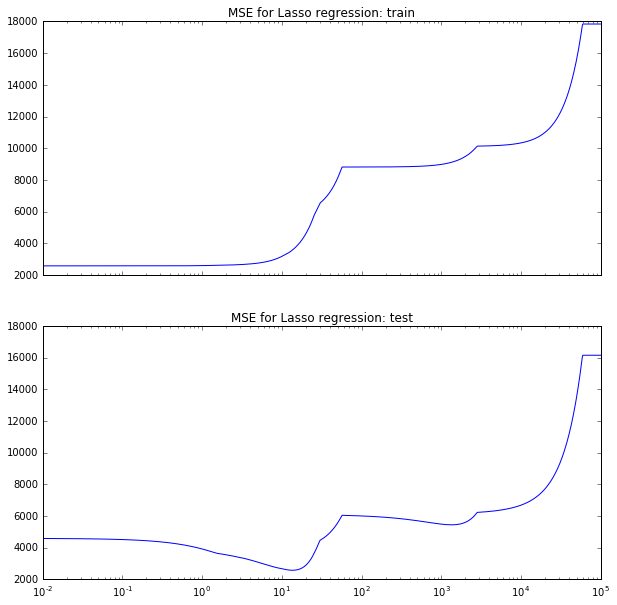

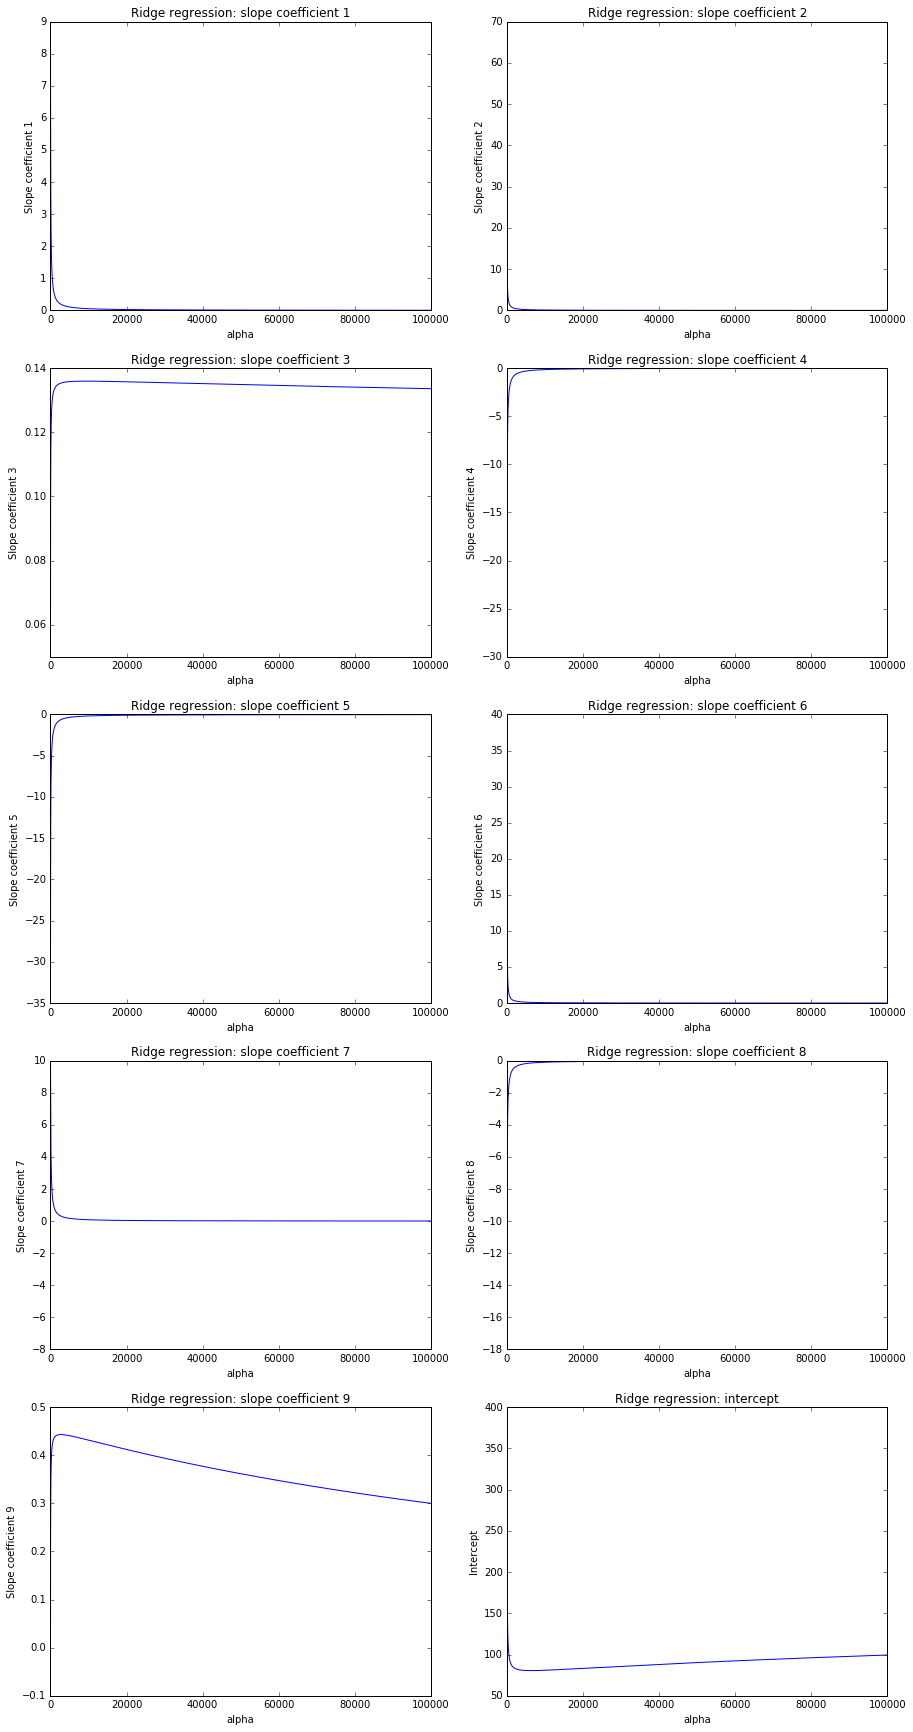

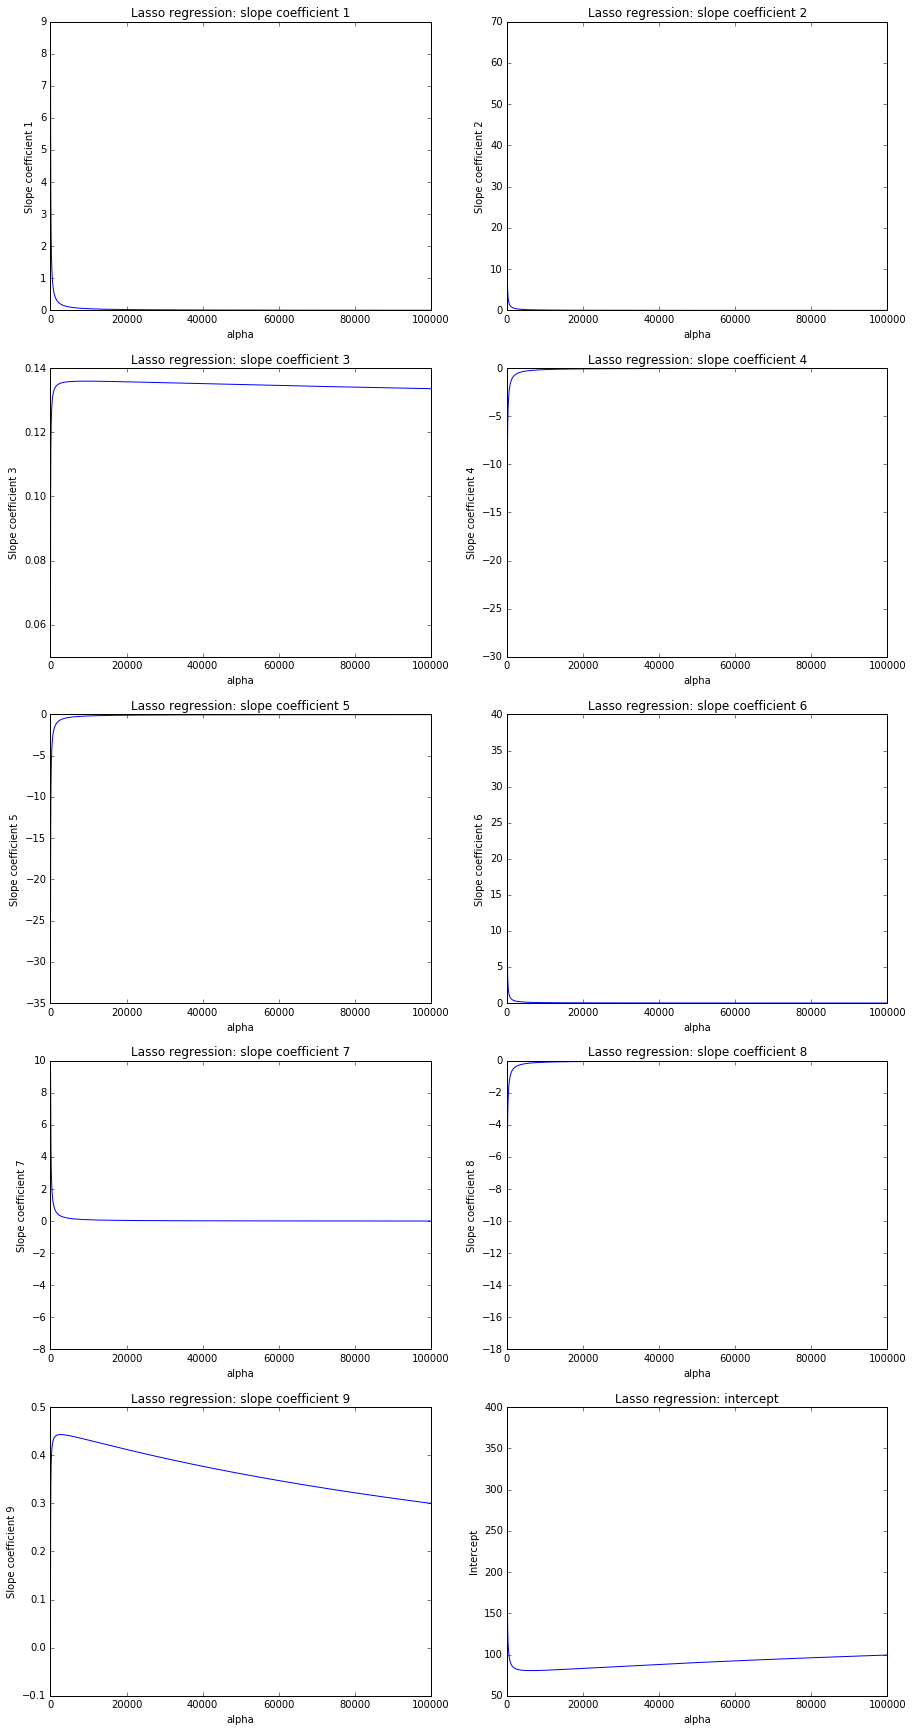

In [173]:
X, y, X_train, y_train, X_test, y_test = analyse(new_data, 2321)

In [174]:
evaluate(Ridge, 10, X, y, X_train, y_train, X_test, y_test)

Ошибка после обучения только на train: 2466.45217202
Ошибка после обучения на всей выборке: 1764.47023253
Коэффициенты после обучения только на train: [ 301.14202593  321.99142701  292.8102054   271.01399557  265.80658551
  319.8717846   300.90570351  281.38528707  292.82470688]
Коэффициенты после обучения на всей выборке: [ 286.04793869  298.76863309  271.54950344  250.85681038  242.85783573
  292.43426313  280.20962235  259.957336    271.61420362]
Ошибка после обучения только на test: 1764.47023253
Соотношение ошибки, полученной после обучение на все выборке и после обучения на train:  0.715387978142
[ 0.94987718  0.9278776   0.92739084  0.92562308  0.91366373  0.91422338
  0.93122071  0.92384836  0.92756587]


In [175]:
evaluate(Lasso, 10, X, y, X_train, y_train, X_test, y_test)

Ошибка после обучения только на train: 2682.60339698
Ошибка после обучения на всей выборке: 2147.62300625
Коэффициенты после обучения только на train: [ 262.04547914  299.63211898  262.12727344  246.67645154  226.44690702
  287.15487459  262.04547914  262.04547914  262.15693829]
Коэффициенты после обучения на всей выборке: [ 246.95040592  266.34256709  242.15213617  229.97377346  205.27883769
  260.35622245  242.06199347  241.68697782  242.22360236]
Ошибка после обучения только на test: 2147.62300625
Соотношение ошибки, полученной после обучение на все выборке и после обучения на train:  0.800574176813
[ 0.94239522  0.88889859  0.92379604  0.93228913  0.90652083  0.90667527
  0.92374039  0.92230928  0.92396411]


Видим, что предсказания стали гораздо лучше.